## Observations and Insights 

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_study = pd.merge(mouse_metadata, study_results,on = 'Mouse ID')

# Display the data table for preview

combined_mouse_study             


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [68]:
# Checking the number of mice.
mouse_count = mouse_metadata['Mouse ID'].count()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

combined_mouse_study.loc[combined_mouse_study.duplicated(subset = ['Mouse ID', 'Timepoint'])]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

newcombo_mouse_study = combined_mouse_study.drop_duplicates(subset=['Mouse ID','Timepoint'])
newcombo_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [23]:
# Checking the number of mice in the clean DataFrame.

newcombo_mouse_study['Tumor Volume (mm3)'].mean()


50.449276454131365

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_tumor_summary = pd.DataFrame({"Mean of Tumor": regimen_tumormean, "Median of Tumor": regimen_tumormedian, 
                                      "Var of Tumor": regimen_tumorvar, "Standard Dev of Tumor": regimen_tumorstd, "SEM of Tumor": regimen_tumorsem})

regimen_tumor_summary

,Mean of Tumor,Median of Tumor,Var of Tumor,Standard Dev of Tumor,SEM of Tumor
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
#Mean of Tumor for each Regimen 
regimen_group= newcombo_mouse_study.groupby('Drug Regimen')
regimen_tumormean = regimen_group['Tumor Volume (mm3)'].mean()
regimen_tumormean.round(2)

Drug Regimen
Capomulin    40.68
Ceftamin     52.59
Infubinol    52.88
Ketapril     55.24
Naftisol     54.33
Placebo      54.03
Propriva     52.39
Ramicane     40.22
Stelasyn     54.23
Zoniferol    53.24
Name: Tumor Volume (mm3), dtype: float64

In [161]:
#Median of Tumor for each Regimen
regimen_group= newcombo_mouse_study.groupby('Drug Regimen')
regimen_tumormedian = regimen_group['Tumor Volume (mm3)'].median()
regimen_tumormedian.round(2)


Drug Regimen
Capomulin    41.56
Ceftamin     51.78
Infubinol    51.82
Ketapril     53.70
Naftisol     52.51
Placebo      52.29
Propriva     50.91
Ramicane     40.67
Stelasyn     52.43
Zoniferol    51.82
Name: Tumor Volume (mm3), dtype: float64

In [34]:
#Variance of Tumor for each Regimen 

regimen_group= newcombo_mouse_study.groupby('Drug Regimen')
regimen_tumorvar = regimen_group['Tumor Volume (mm3)'].var()
regimen_tumorvar.round(2)

Drug Regimen
Capomulin    24.95
Ceftamin     39.29
Infubinol    43.13
Ketapril     68.55
Naftisol     66.17
Placebo      61.17
Propriva     43.14
Ramicane     23.49
Stelasyn     59.45
Zoniferol    48.53
Name: Tumor Volume (mm3), dtype: float64

In [35]:
#Standard Deviation of Tumor for each Regimen 
regimen_group= newcombo_mouse_study.groupby('Drug Regimen')
regimen_tumorstd = regimen_group['Tumor Volume (mm3)'].std()
regimen_tumorstd.round(2)

Drug Regimen
Capomulin    4.99
Ceftamin     6.27
Infubinol    6.57
Ketapril     8.28
Naftisol     8.13
Placebo      7.82
Propriva     6.57
Ramicane     4.85
Stelasyn     7.71
Zoniferol    6.97
Name: Tumor Volume (mm3), dtype: float64

In [38]:
regimen_group= newcombo_mouse_study.groupby('Drug Regimen')
regimen_tumorsem = regimen_group['Tumor Volume (mm3)'].sem()
regimen_tumorsem.round(2)

Drug Regimen
Capomulin    0.33
Ceftamin     0.47
Infubinol    0.49
Ketapril     0.60
Naftisol     0.60
Placebo      0.58
Propriva     0.53
Ramicane     0.32
Stelasyn     0.57
Zoniferol    0.52
Name: Tumor Volume (mm3), dtype: float64

In [113]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
timemouse_group = newcombo_mouse_study.groupby(["Drug Regimen"])
timepoint_mouse = timemouse_group["Timepoint"].sum()
timepoint_mouse

Drug Regimen
Capomulin    4960
Ceftamin     3515
Infubinol    3235
Ketapril     3705
Naftisol     3650
Placebo      3380
Propriva     2665
Ramicane     4885
Stelasyn     3480
Zoniferol    3525
Name: Timepoint, dtype: int64

## Bar and Pie Charts

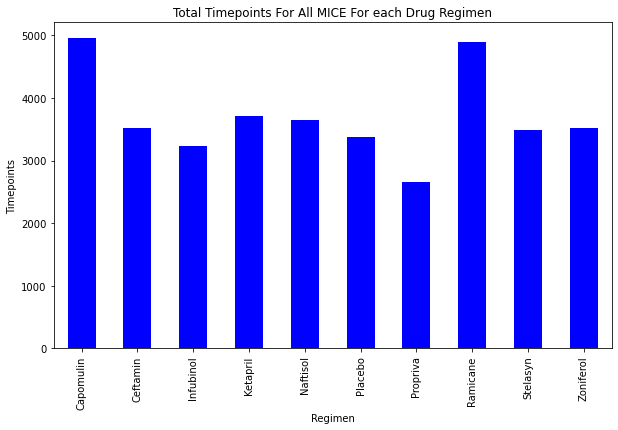

<Figure size 432x288 with 0 Axes>

In [64]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timemouse_group = newcombo_mouse_study.groupby(["Drug Regimen"])
timepoint_mouse = timemouse_group["Timepoint"].sum()
timepoint_mouse

figure1 = timepoint_mouse.plot(kind="bar", facecolor="blue", figsize=(10,6),
                                title="Total Timepoints For All MICE For each Drug Regimen",
                                xlabel="Regimen",
                                ylabel="Timepoints")
plt.show()
plt.tight_layout()

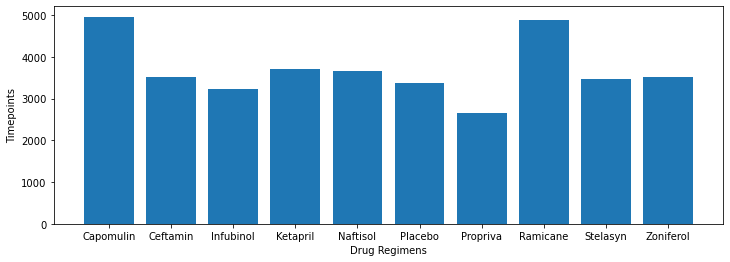

In [116]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.figure(figsize=(12,4))
plt.bar(timepoint_mouse.index.values, timepoint_mouse.values)
plt.xlabel("Drug Regimens")
plt.ylabel("Timepoints")
plt.show()


Text(0.5, 1.0, 'Distribution of Female vs Male Mice')

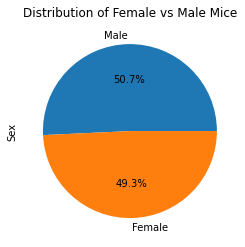

In [141]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


Mouse_sex = newcombo_mouse_study['Sex'].value_counts()

pie_mousechart = Mouse_sex.plot(kind ="pie", autopct="%1.1f%%")

pie_mousechart.set_title("Distribution of Female vs Male Mice")

In [134]:
newcombo_mouse_study['Sex'].value_counts()

Male      958
Female    930
Name: Sex, dtype: int64

In [157]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex = newcombo_mouse_study.groupby(newcombo_mouse_study["Sex"])["Sex"].value_counts()
colors = ["pink", "blue"]
explode = (0,0)

([<matplotlib.patches.Wedge at 0x1b4adc84d60>,
 [Text(-0.40019781812626554, -1.024617834300661, "('Female', 'Female')"),
  Text(0.4001979140579089, 1.0246177968314325, "('Male', 'Male')")],
 [Text(-0.21828971897796298, -0.5588824550730878, '49.3%'),
  Text(0.2182897713043139, 0.5588824346353268, '50.7%')])

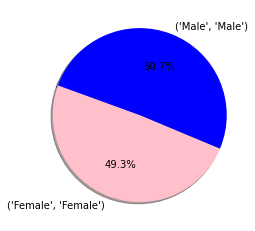

In [159]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex, explode=explode, labels=sex.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [178]:
drug_index = newcombo_mouse_study.set_index("Drug Regimen")
drug_indexcap = drug_index.loc["Capomulin", ["Timepoint"]]
drug_indexcap


,Timepoint
Drug Regimen,
Capomulin,0
Capomulin,5
Capomulin,10
Capomulin,15
Capomulin,20
...,...
Capomulin,45
Capomulin,0
Capomulin,5


In [181]:
drug_index = newcombo_mouse_study.set_index("Drug Regimen")
drug_indextum = drug_index.loc["Capomulin", ["Tumor Volume (mm3)"]]
drug_indextum

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,45.000000
Capomulin,43.878496
Capomulin,37.614948
Capomulin,38.177232
Capomulin,36.866876
...,...
Capomulin,47.685963
Capomulin,45.000000
Capomulin,45.597064


In [187]:
mouse= drug_index.loc["Capomulin", ["Mouse ID"]].keys
mouse

<bound method NDFrame.keys of              Mouse ID
Drug Regimen         
Capomulin        s185
Capomulin        s185
Capomulin        s185
Capomulin        s185
Capomulin        s185
...               ...
Capomulin        i557
Capomulin        r157
Capomulin        r157
Capomulin        r157
Capomulin        r157

[230 rows x 1 columns]>

InvalidIndexError: (slice(None, None, None), None)

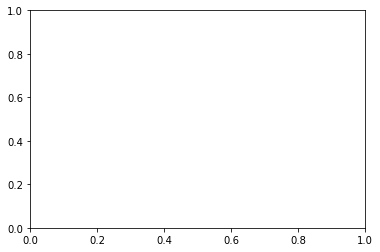

In [188]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

drug_captime = plt.plot(mouse, drug_indextum, color="blue", label="Tumor Volume Vs Timepoint" )


        
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
